<h1 align='center'> 파이썬과학프로그래밍기초 실습 9</h1>

<p style="text-align: right"> 2023.11.16.</p>

### 
<div class="alert alert-block alert-info">
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름:김민준   &nbsp;&nbsp;          학번:20235128    &nbsp;&nbsp;         학과(전공):소프트웨어융합
    
</div>

- Jupyter notebook에 대한 설명은 [The Jupyter Notebook](https://jupyter-notebook.readthedocs.io/en/stable/)을  참고하라

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)

* 과제 제출: 11월 15일 (수) 오후 10:00까지 최종본 제출. 


### 예제 0: 아래 셀에 다음 명령을 실행하라.

```
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
```


In [83]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.datasets as ds

In [84]:
import sys
sys.version

'3.9.13 (tags/v3.9.13:6de2ca5, May 17 2022, 16:36:42) [MSC v.1929 64 bit (AMD64)]'

In [85]:
import cv2
#cv2.__version__

### 예제 1.
지난 주 문제 1의 3원색 겹친 원 그리기

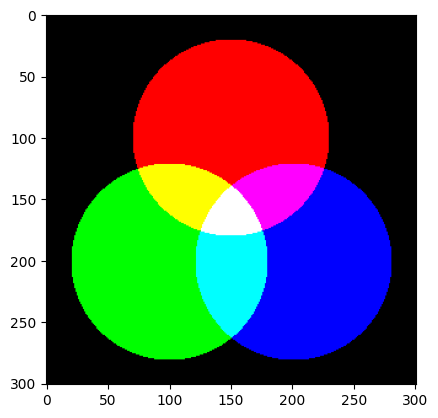

In [86]:
cols = rows = a = 301
margin = 20 
radius = margin * 4
cr = np.array([margin+radius, a//2])
cg = np.array([a-radius-margin, margin+radius])
cb = np.array([a-radius-margin, a-radius-margin])
img = np.zeros((rows, cols, 3), dtype=np.uint8)

r = np.arange(rows).reshape(-1,1)
c = np.arange(cols).reshape(1,-1)

img[(r-cr[0])**2 + (c-cr[1])**2 < radius**2] = np.array([255, 0, 0])
img1 = np.zeros((rows, cols, 3), dtype=np.uint8)
img1[ (r-cg[0])**2 + (c-cg[1])**2 < radius**2] = np.array([0, 255, 0])
img2 = np.zeros((rows, cols, 3), dtype=np.uint8)
img2[ (r-cb[0])**2 + (c-cb[1])**2 < radius**2] = np.array([0, 0, 255])
img = img + img1 +img2

plt.imshow(img)
plt.show()

### 예제 2.
Ndarray 데이터를 이미지 파일로 저장하기.

아래 셀을 실행하여 예제 1에서 만든 ndarray를 이미지 파일로 저장하라.

In [87]:
import matplotlib.image as mplimg
mplimg.imsave('test.png', img)

### 예제 3.

아래 셀을 실행하여 예제 2에서 만든 파일을 확인하라.

단, Mac OS에서는 dir 대신에 ls -l을 사용한다.

!ls -al test.png

In [88]:
!dir test.png

 Volume in drive C has no label.
 Volume Serial Number is 36A9-0FEC

 Directory of C:\Users Files\mjk\Coding\PyCharm\PythonScientificProgrammingBasics-SeophyungPark\Src\Final\Week12-1

11/16/2023  03:36 PM             2,805 test.png
               1 File(s)          2,805 bytes
               0 Dir(s)  226,572,558,336 bytes free


### 예제 4.
예제 3에서 저장한 파일을 읽어서 화면에 표시하라.

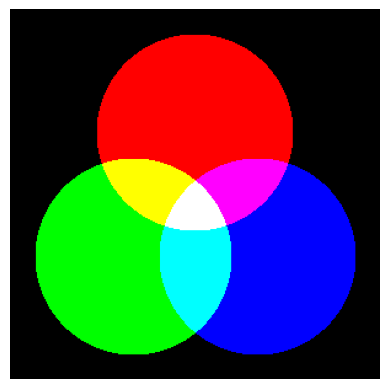

In [89]:
img2 = plt.imread('test.png')
plt.imshow(img2)
plt.axis('off')
plt.show()

### 문제 1. 다음과 같은 영상을 ndarray로 만들어서 화면에 표시하는 프로그램을 작성하라.


<img src='four_circles.png' width="50%"/>

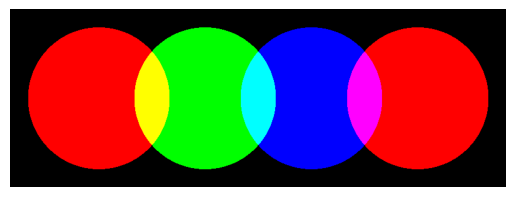

In [90]:
# function
def drawCircle(img, pos_y, pos_x, radius, RGB):
    row = np.arange(img.shape[0]).reshape(-1,1)
    col = np.arange(img.shape[1]).reshape(1,-1)
    
    temp_img = np.zeros((img.shape[0], img.shape[1], img.shape[2]), dtype=np.uint8)
    temp_img[(row-pos_y)**2 + (col-pos_x)**2 <= radius**2] += RGB
    
    img += temp_img
    return
# color
RED = np.array([255, 0, 0], dtype=np.uint8)
GREEN = np.array([0, 255, 0], dtype=np.uint8)
BLUE = np.array([0, 0, 255], dtype=np.uint8)
# img size
IMG_HEIGHT = 301
IMG_WIDTH = 840
img = np.zeros((IMG_HEIGHT, IMG_WIDTH, 3), dtype=np.uint8) # y_size, x_size, RGB(왼쪽 상단 {0, 0})
'''
img = np.zeros([IMG_HEIGHT, IMG_WIDTH, 3], dtype=np.uint8) # y_size, x_size, RGB(왼쪽 상단 {0, 0})
()와 []의 차이점 질문
'''
# gap = 180px
drawCircle(img, IMG_HEIGHT/2, 150, 120, RED) # pos(420, 150)
drawCircle(img, IMG_HEIGHT/2, 330, 120, GREEN) # pos(420, 330)
drawCircle(img, IMG_HEIGHT/2, 510, 120, BLUE) # pos(420, 510)
drawCircle(img, IMG_HEIGHT/2, 690, 120, RED) # pos(420, 690)
# plt.show
plt.imshow(img)
plt.axis('off')
plt.show()

|### 문제 2. 
다음 영상은 흰색 종이에 네 색(cyan, magenta, yellow, cyan)의 원을 그렸을 때 나타나는 그림을 영상으로 표현한 것이다. 화면에 이 그림을 표시하는 프로그램을 작성하라.

참고: 흰 색 배경에서 R, G, B, R 네 영상을 빼면 된다.


<img src='four_circles_paint.png' width="50%"/>

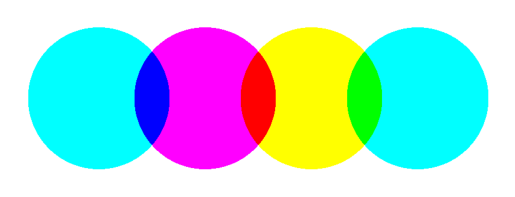

In [91]:
# function
def drawCircle(img, pos_y, pos_x, radius, RGB):
    row = np.arange(img.shape[0]).reshape(-1,1)
    col = np.arange(img.shape[1]).reshape(1,-1)
    
    temp_img = np.zeros((img.shape[0], img.shape[1], img.shape[2]), dtype=np.uint8)
    temp_img[(row-pos_y)**2 + (col-pos_x)**2 <= radius**2] -= RGB
    
    img += temp_img
    return
# color
RED = np.array([255, 0, 0], dtype=np.uint8)
GREEN = np.array([0, 255, 0], dtype=np.uint8)
BLUE = np.array([0, 0, 255], dtype=np.uint8)
# img size
IMG_HEIGHT = 301
IMG_WIDTH = 840
img = np.full((IMG_HEIGHT, IMG_WIDTH, 3), [255, 255, 255], dtype=np.uint8) # y_size, x_size, RGB(왼쪽 상단 {0, 0})
# gap = 180px
drawCircle(img, IMG_HEIGHT/2, 150, 120, RED) # pos(420, 150)
drawCircle(img, IMG_HEIGHT/2, 330, 120, GREEN) # pos(420, 330)
drawCircle(img, IMG_HEIGHT/2, 510, 120, BLUE) # pos(420, 510)
drawCircle(img, IMG_HEIGHT/2, 690, 120, RED) # pos(420, 690)
# plt.show
plt.imshow(img)
plt.axis('off')
plt.show()

### 예제 2. 
NumPy ndarray를 이용하여 다음 영상을 만들어서 화면에 표시하라.

단, 작은 사각형의 크기는 20 x 20으로 하라.

<img src='bw_check_pattern.png' width="25%"/>

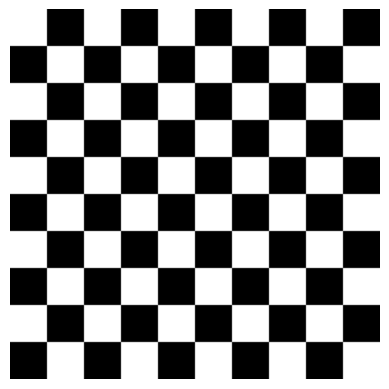

In [92]:
N = 20
r = 12
b5 = np.zeros((N,N,3), np.uint8)
w5 = np.full((N,N,3), [255,255,255], np.uint8)
b5w5 = np.hstack((w5, b5)*5)
w5b5 = np.hstack((b5, w5)*5)
img = np.vstack((b5w5, w5b5)*5)

plt.imshow(img)
plt.axis('off')
plt.show()

### 문제 3. 

NumPy ndarray를 이용하여 다음 영상을 만들어서 화면에 표시하라.

단, 작은 사각형의 크기는 20 x 20으로 하라.

<img src='color_check_pattern.png' width="40%"/>

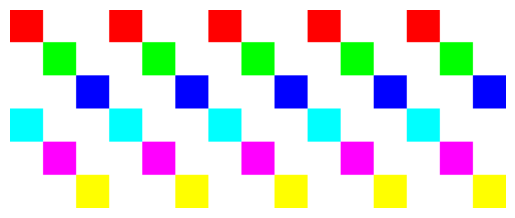

In [100]:
# function
def drawBox(img, pos_y, pos_x, size, RGB):
    box = np.full((size, size, 3), RGB, dtype=np.uint8)
    img[pos_y:pos_y+size,pos_x:pos_x+size,:] = box
    return
# color
RED = np.array([255, 0, 0], dtype=np.uint8)
GREEN = np.array([0, 255, 0], dtype=np.uint8)
BLUE = np.array([0, 0, 255], dtype=np.uint8)
CYAN = np.array([0, 255, 255], dtype=np.uint8)
MAGENTA = np.array([255, 0, 255], dtype=np.uint8)
YELLOW = np.array([255, 255, 0], dtype=np.uint8)
WHITE = np.array([255, 255, 255], dtype=np.uint8)
# img size
IMG_HEIGHT = 120
IMG_WIDTH = 300
img = np.full((IMG_HEIGHT, IMG_WIDTH, 3), WHITE, dtype=np.uint8) # y_size, x_size, RGB(왼쪽 상단 {0, 0})
# Make pattern
BOX_SIZE = 20
temp = np.full((BOX_SIZE*3, BOX_SIZE*3, 3), WHITE, dtype=np.uint8)
drawBox(temp, 0, 0, BOX_SIZE, RED)
drawBox(temp, 20, 20, BOX_SIZE, GREEN)
drawBox(temp, 40, 40, BOX_SIZE, BLUE)
temp_upper = np.hstack((temp, temp, temp, temp, temp), dtype=np.uint8)
temp = np.full((BOX_SIZE*3, BOX_SIZE*3, 3), WHITE, dtype=np.uint8)
drawBox(temp, 0, 0, BOX_SIZE, CYAN)
drawBox(temp, 20, 20, BOX_SIZE, MAGENTA)
drawBox(temp, 40, 40, BOX_SIZE, YELLOW)
temp_lower = np.hstack((temp, temp, temp, temp, temp), dtype=np.uint8)
img = np.vstack((temp_upper, temp_lower), dtype=np.uint8)
# plt.show
plt.imshow(img)
plt.axis('off')
plt.show()

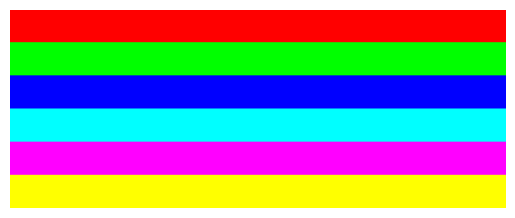